In [12]:
import pandas as pd
import os 
from matplotlib import pyplot as plt
import numpy as np
#import plotly.plotly as py
#import plotly.graph_objs as go
#import plotly.tools as tls
import seaborn as sns



#Decide what columns we need
A_csv = pd.read_csv('xaa.csv')
B_csv = pd.read_csv('xab.csv', header=None)
C_csv = pd.read_csv('xac.csv', header=None)
D_csv = pd.read_csv('xad.csv', header=None)
#Add correct index to split csv
B_csv.columns = A_csv.columns
C_csv.columns = A_csv.columns
D_csv.columns = A_csv.columns
#Merging
AB_csv = pd.merge(A_csv, B_csv,how='outer')

ABC_csv = pd.merge(AB_csv, C_csv,how='outer')

ABCD_csv = pd.merge(ABC_csv, D_csv,how='outer')

master_df = ABCD_csv

In [13]:
#Function to change GeoLoc value
def geo_switch(geo):
    try:
        [lat, long] = str(geo[0])[1:-1].split(',')
    except TypeError:
        [lat, long] = ['NaN', 'NaN']
    except ValueError:
        [lat, long] = str(geo)[1:-1].split(',')
    
    
    return [lat, long]

In [14]:
#change the master_df using apply
master_df['GeoLocation'] = master_df['GeoLocation'].apply(lambda x: geo_switch(x))


In [15]:
#Dropping the US lines Values
master_df = master_df.dropna(subset=['CityName', 'GeoLocation'])

#Dropping the "CrdPrv" lines
master_df = master_df[master_df.DataValueTypeID != "CrdPrv"]
master_df.shape

(14000, 13)

In [16]:
master_df = master_df.assign(Measure_pop = master_df['Data_Value'] / 100 * master_df['PopulationCount'])
master_df['Measure_pop'] = master_df['Measure_pop'].fillna(0).astype(int)
master_df.shape

(14000, 14)

In [17]:
#unique list of categories and states
cat_id = master_df['Category'].unique()
states = master_df['StateAbbr'].unique()
#dictionary to hold your data
df_dict = {}

#index through to grab dataframe for each category
for category in cat_id:
    category_group = master_df[master_df['Category'] == category]
#get category info for each state        
    for state in states:
        state_group =  category_group[category_group['StateAbbr'] == state]
#create keys for the df_dict and values for each state
        df_dict[category+' '+ state] = state_group


In [18]:
#Prevention dictionary for all states
prevent_state_df = pd.DataFrame()
prevent_dict = {}
for state in states:
#make keys the state abbr
    prevent_dict[state] = (df_dict.get('Prevention'+' '+state))
    prevent_state_df = prevent_state_df.append(prevent_dict[state])


In [19]:
#Unhealthy DateFrame for all states
unhealthy_state_df = pd.DataFrame()
#Unhealthy dictionary for all states
unhealthy_dict = {}
for state in states: 
#make keys the state abbr
    unhealthy_dict[state] = (df_dict.get('Unhealthy Behaviors'+' '+state))
    unhealthy_state_df = unhealthy_state_df.append(unhealthy_dict[state])
unhealthy_state_df.head(20)

,Year,StateAbbr,CityName,GeographicLevel,Category,Measure,DataValueTypeID,Data_Value_Type,Data_Value,PopulationCount,GeoLocation,CategoryID,MeasureId,Measure_pop
256,2016,AL,Birmingham,City,Unhealthy Behaviors,Binge drinking among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,13.0,212237,"[33.5275663773, -86.7988174678]",UNHBEH,BINGE,27590
1460,2016,AL,Birmingham,City,Unhealthy Behaviors,Current smoking among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,22.6,212237,"[33.5275663773, -86.7988174678]",UNHBEH,CSMOKING,47965
1958,2016,AL,Birmingham,City,Unhealthy Behaviors,No leisure-time physical activity among adults...,AgeAdjPrv,Age-adjusted prevalence,35.8,212237,"[33.5275663773, -86.7988174678]",UNHBEH,LPA,75980
2258,2016,AL,Birmingham,City,Unhealthy Behaviors,Obesity among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,42.6,212237,"[33.5275663773, -86.7988174678]",UNHBEH,OBESITY,90412
2554,2016,AL,Birmingham,City,Unhealthy Behaviors,Sleeping less than 7 hours among adults aged >...,AgeAdjPrv,Age-adjusted prevalence,41.8,212237,"[33.5275663773, -86.7988174678]",UNHBEH,SLEEP,88715
2913,2016,AL,Hoover,City,Unhealthy Behaviors,Binge drinking among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,18.0,81619,"[33.3767602729, -86.8051937568]",UNHBEH,BINGE,14691
3282,2016,AL,Hoover,City,Unhealthy Behaviors,Current smoking among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,13.9,81619,"[33.3767602729, -86.8051937568]",UNHBEH,CSMOKING,11345
3438,2016,AL,Hoover,City,Unhealthy Behaviors,No leisure-time physical activity among adults...,AgeAdjPrv,Age-adjusted prevalence,20.2,81619,"[33.3767602729, -86.8051937568]",UNHBEH,LPA,16487
3531,2016,AL,Hoover,City,Unhealthy Behaviors,Obesity among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,28.9,81619,"[33.3767602729, -86.8051937568]",UNHBEH,OBESITY,23587
3622,2016,AL,Hoover,City,Unhealthy Behaviors,Sleeping less than 7 hours among adults aged >...,AgeAdjPrv,Age-adjusted prevalence,32.8,81619,"[33.3767602729, -86.8051937568]",UNHBEH,SLEEP,26771


In [20]:
#Outcomes dictionary for all states
outcomes_state_df = pd.DataFrame()
outcomes_dict = {}

for state in states:
#make keys the state abbr
    outcomes_dict[state] = (df_dict.get('Health Outcomes'+' '+state))
    outcomes_state_df = outcomes_state_df.append(outcomes_dict[state])



In [21]:
def get_data(category_df):
    group_df = category_df.groupby(['StateAbbr', 'MeasureId']).sum()
    group_df = group_df.assign(true_st_percent = group_df['Measure_pop'] / group_df['PopulationCount']*100)
    group_df = group_df.drop(columns=['Data_Value', 'Year']).reset_index()
    return group_df

In [22]:
prevent_percent = get_data(prevent_state_df)
unhealthy_percent = get_data(unhealthy_state_df)
outcomes_percent = get_data(outcomes_state_df)
prevent_percent.head()

,StateAbbr,MeasureId,PopulationCount,Measure_pop,true_st_percent
0,AK,ACCESS2,291826,36770,12.599974
1,AK,BPMED,291826,147663,50.599672
2,AK,CHECKUP,291826,171593,58.799764
3,AK,CHOLSCREEN,291826,206612,70.799723
4,AK,COLON_SCREEN,291826,186184,63.799661


In [23]:
binge = unhealthy_percent[unhealthy_percent['MeasureId'] == 'BINGE']
#binge.sort_values(by=['true_st_percent'], ascending=False).reset_index(drop=True)
binge['Rank'] = binge['true_st_percent'].rank(ascending=False)

C:\Users\dougf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#get ranks for each measureId 
def measure_rank(category_df):
    new_df = pd.DataFrame()
    measures = category_df['MeasureId'].unique()
    
    for measure in measures:
        measure_type = category_df[category_df['MeasureId'] == measure]
        measure_type['Rank'] = measure_type['true_st_percent'].rank(ascending=False)
        new_df = new_df.append(measure_type)
        




    return new_df

In [25]:
prevent_measure_rank = measure_rank(prevent_percent)
unhealthy_measure_rank = measure_rank(unhealthy_percent)
outcomes_measure_rank = measure_rank(outcomes_percent)


C:\Users\dougf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
#get mean of ranks for each state
def avg_rank(measure_rank_df):
    rank_df = pd.DataFrame(index= states, columns=['Measure Rank'])
    for state in states:
        measure_avg = int((measure_rank_df[measure_rank_df['StateAbbr'] == state]['Rank']).mean())
        rank_df.loc[state, 'Measure Rank'] = measure_avg
    
    return rank_df.sort_values(by=['Measure Rank']).reset_index().rename(columns={'index': 'State'})

In [27]:
prevent_rank = avg_rank(prevent_measure_rank)
unhealthy_rank = avg_rank(unhealthy_measure_rank)
outcomes_rank = avg_rank(outcomes_measure_rank)

In [28]:
outcomes_rank.head()

,State,Measure Rank
0,MI,6
1,OH,8
2,TN,9
3,MS,9
4,AL,10


In [29]:
def true_rank(category_rank):
    out = pd.DataFrame(index=range(1, 52), columns= ['Rank'])
    for i in range(0, 51):
        out.iloc[i, 0] = (category_rank['State'][i])
    return out
def pretty_rank(true_rank):
    series = pd.Series(range(1, 52))
    rank_df = pd.DataFrame(index = true_rank.iloc[:, 0], columns=['Rank Value'])
    rank_df['Rank Value'] = series.values
    return rank_df

In [30]:
prevent_pretty_rank = pretty_rank(true_rank(prevent_rank))
unhealthy_pretty_rank = pretty_rank(true_rank(unhealthy_rank))
outcomes_pretty_rank = pretty_rank(true_rank(outcomes_rank))

In [31]:
prevent_pretty_rank.head()

,Rank Value
Rank,
VA,1
WV,2
NC,3
AL,4
KY,5


In [32]:
tls.set_credentials_file(username='AhsanNisar1',api_key='erOR98WysTOrkYAMhDXq')
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = prevent_pretty_rank.index,
    z = prevent_pretty_rank['Rank Value'].astype(float),
    locationmode = 'USA-states',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Rank")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'US States ranking by Prevention category '
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

NameError: name 'tls' is not defined

In [33]:
unhealthy_pretty_rank.head()

,Rank Value
Rank,
MI,1
OH,2
DE,3
PA,4
MD,5


In [34]:
tls.set_credentials_file(username='AhsanNisar1',api_key='erOR98WysTOrkYAMhDXq')
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = unhealthy_pretty_rank.index,
    z = unhealthy_pretty_rank['Rank Value'].astype(float),
    locationmode = 'USA-states',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Rank")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'US States ranking by Unhealthy category '
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

NameError: name 'tls' is not defined

In [35]:
outcomes_pretty_rank.head()

,Rank Value
Rank,
MI,1
OH,2
TN,3
MS,4
AL,5


In [36]:
tls.set_credentials_file(username='AhsanNisar1',api_key='erOR98WysTOrkYAMhDXq')
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = outcomes_pretty_rank.index,
    z = outcomes_pretty_rank['Rank Value'].astype(float),
    locationmode = 'USA-states',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Rank")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'US States ranking by Health Outcome'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

NameError: name 'tls' is not defined

In [37]:
top_prevent = prevent_pretty_rank.head().index

In [38]:
# PREVENT
top_prevent = prevent_percent[prevent_percent['MeasureId'] == "BPMED"].nlargest(10, 'true_st_percent')
bottom_prevent = prevent_percent[prevent_percent['MeasureId'] == "BPMED"].nsmallest(0, 'true_st_percent')

prevent = top_prevent.append(bottom_prevent)

In [39]:
#OUTCOME
top_outcome = outcomes_percent[outcomes_percent['MeasureId'] == "BPHIGH"].nlargest(10, 'true_st_percent')
bottom_outcome = outcomes_percent[outcomes_percent['MeasureId'] == "BPHIGH"].nsmallest(0, 'true_st_percent')

outcomes = top_outcome.append(bottom_outcome)


In [41]:
#UNHEALTHY
top_unhealthy = unhealthy_percent[unhealthy_percent['MeasureId'] == "OBESITY"].nlargest(10, 'true_st_percent')
bottom_unhealthy = unhealthy_percent[unhealthy_percent['MeasureId'] == "OBESITY"].nsmallest(0, 'true_st_percent')

unhealthy = top_unhealthy.append(bottom_unhealthy)
out_un_pre = outcomes_prevent.append(unhealthy)

In [42]:
#OUTCOMES AND PREVENT
outcomes_prevent = outcomes.append(prevent)
#OUTCOMES AND UNHEALTHY
out_unhealthy = outcomes.append(unhealthy)
#PREVENT AND UNHEALTHY
prevent_unhealthy = prevent.append(unhealthy)
#ALL
prev_un_out = prevent_unhealthy.append(outcomes)

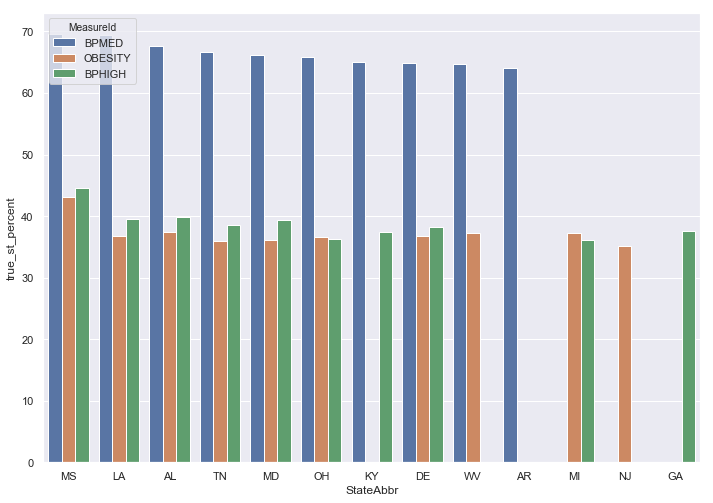

In [47]:
#plot three categories
sns.set(rc={'figure.figsize':(11.78, 8.27)})
ax = sns.barplot(x="StateAbbr", y="true_st_percent", hue="MeasureId", data=prev_un_out)
fig= ax.get_figure()
fig.savefig('3_category.png')

In [48]:
top = prevent_percent[prevent_percent['StateAbbr'] == 'VA']
top[top['MeasureId'] == 'CHECKUP']

,StateAbbr,MeasureId,PopulationCount,Measure_pop,true_st_percent
452,VA,CHECKUP,1918061,1446515,75.415485


In [49]:
#prevent: measure checkup dataframe for barplot
healthy_states = list(prevent_pretty_rank.head().index)
healthy_top_5  = pd.DataFrame(index=healthy_states, columns=['Healthy'])
for state in healthy_states:
    top_state = prevent_percent[prevent_percent['StateAbbr'] == state]
    healthy = top_state[top_state['MeasureId'] == 'CHECKUP']['true_st_percent']
    healthy_top_5.loc[state, 'Healthy'] = float(healthy)

In [50]:
list(healthy_top_5.index)

['VA', 'WV', 'NC', 'AL', 'KY']

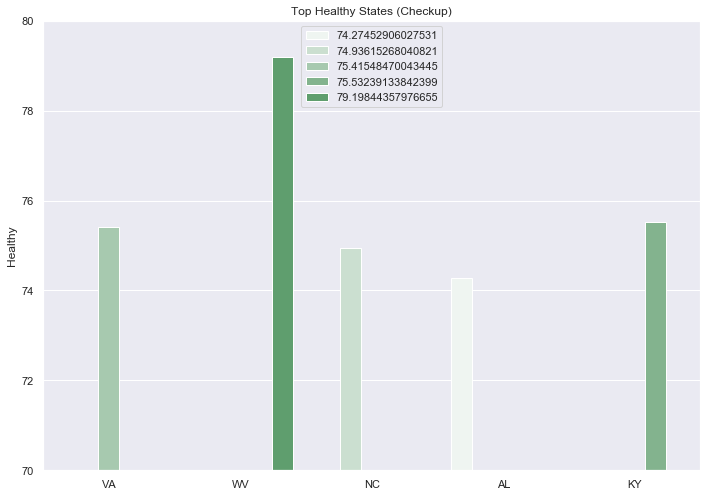

In [51]:

checkups_top_5 = sns.barplot(x=list(healthy_top_5.index),hue=list(healthy_top_5['Healthy']),color='g', y='Healthy', data= healthy_top_5)

checkups_top_5.set(title= 'Top Healthy States (Checkup)',xlim = None, ylim=(70,80))
checkups_top_5.set(xticks=range(0,5))
fig2 = checkups_top_5.get_figure()
fig2.savefig('Checkup.png')

In [53]:
unhealthy_states = list(unhealthy_pretty_rank.head().index)
unhealthy_top_5  = pd.DataFrame(index=unhealthy_states, columns=['Binge', 'Obesity'])
for state in unhealthy_states:
    top_unhealthy_state = unhealthy_percent[unhealthy_percent['StateAbbr'] == state]
    unhealthy_BINGE = top_unhealthy_state[top_unhealthy_state['MeasureId'] == 'BINGE']['true_st_percent']
    unhealthy_OBESITY = top_unhealthy_state[top_unhealthy_state['MeasureId'] == 'OBESITY']['true_st_percent']
    unhealthy_top_5.loc[state, 'Binge'] = float(unhealthy_BINGE)
    unhealthy_top_5.loc[state, 'Obesity'] = float(unhealthy_OBESITY)

In [54]:
unhealthy_top_5.columns

Index(['Binge', 'Obesity'], dtype='object')

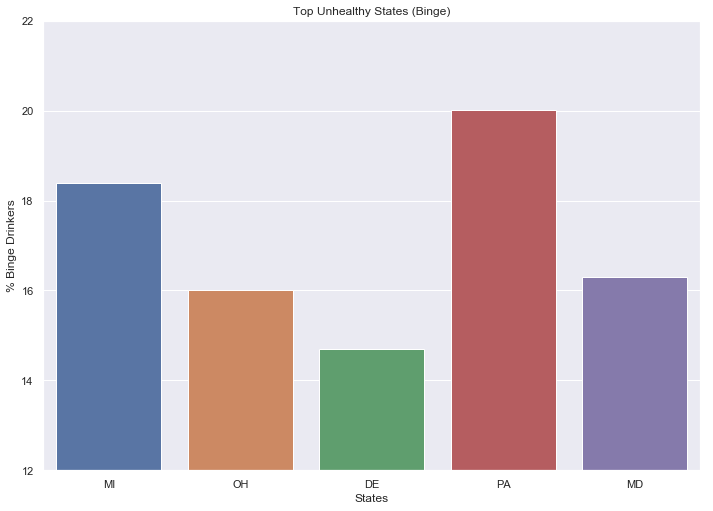

In [56]:
import matplotlib.pyplot as plt
binge_top_5 = sns.barplot(x=list(unhealthy_top_5.index), y='Binge', data= unhealthy_top_5)
binge_top_5.set(title= 'Top Unhealthy States (Binge)',xlim = None, ylim=(12,22), xlabel='States', ylabel="% Binge Drinkers")
fig3 = binge_top_5.get_figure()
fig3.savefig('Binge_top_5')

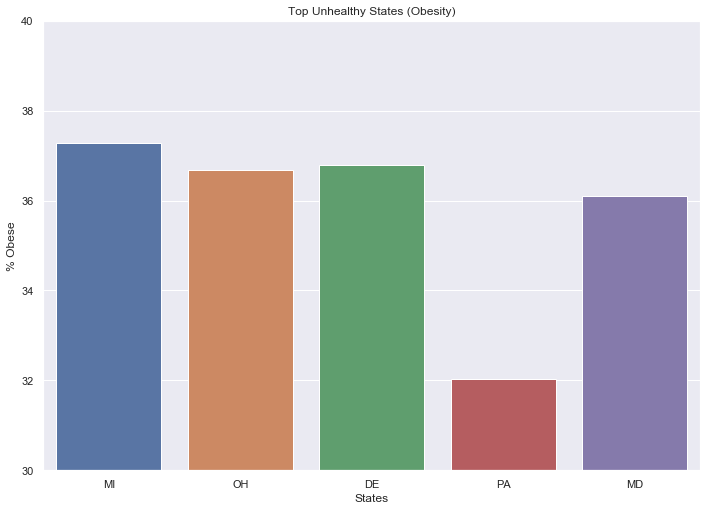

In [60]:
obesity_top_5 = sns.barplot(x=list(unhealthy_top_5.index), y='Obesity', data= unhealthy_top_5)
obesity_top_5.set(title='Top Unhealthy States (Obesity)', xlim = None, ylim=(30,40),xlabel='States', ylabel="% Obese")
fig4 = obesity_top_5.get_figure()
fig4.savefig('Obesity_top_5')

In [189]:
np.array(healthy_top_5['Healthy'])

array([75.41548470043445, 79.19844357976655, 74.93615268040821,
       74.27452906027531, 75.53239133842399], dtype=object)

In [228]:
unhealthy_state_df['Measure'].unique()

array(['Binge drinking among adults aged >=18 Years',
       'Current smoking among adults aged >=18 Years',
       'No leisure-time physical activity among adults aged >=18 Years',
       'Obesity among adults aged >=18 Years',
       'Sleeping less than 7 hours among adults aged >=18 Years'],
      dtype=object)

# Conclusion


In [ ]:
Our conclusions show that Michigan has the most uhealthy beahaviors by metropolitian population percentage and the most diseased population. 
Our hypothesis was proven wrong, kindof, California tended toward the healthiest and least diseased, while Mississipi trended toward more unhealthy and more diseased. 




In [7]:
!pip install plotly

  Could not fetch URL https://pypi.org/simple/plotly/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/plotly/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


pip is configured with locations that require TLS/SSL, however the ssl module in Python is not available.
  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError("Can't connect to HTTPS URL because the SSL module is not available.")': /simple/plotly/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError("Can't connect to HTTPS URL because the SSL module is not available.")': /simple/plotly/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError("Can't connect to HTTPS URL because the SSL module is not available.")': /simple/plotly/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError("Can't connect to HTTPS URL because the SSL module is not available.")': /simple/plotly/
  Retrying (Retry(total=0, connect=None, read=None, redirect=None,